In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,NaN,3.0
1,NaN,NaN,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,NaN,261.0,0.0,NaN,NaN,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,0.0,NaN,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,NaN,199.0,NaN,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,NaN,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,NaN,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	28
float64		column 2	35
float64		column 3	22
float64		column 4	21
float64		column 5	14
float64		column 6	28
float64		column 7	28
float64		column 8	22
float64		column 9	50
float64		column 10	22
float64		column 11	21
float64		column 12	15
float64		column 13	36


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,242.000000,235.000000,248.000000,249.000000,256.000000,242.00000,242.000000,248.000000,220.000000,248.000000,249.000000,255.000000,234.000000
mean,0.690083,54.540426,3.201613,130.943775,249.304688,0.14876,1.041322,149.254032,0.350000,1.052823,1.594378,0.650980,4.713675
std,0.463418,8.838138,0.917485,16.902855,51.599751,0.35659,0.997064,23.141791,0.478057,1.130007,0.609178,0.917754,1.947615
min,0.000000,34.000000,1.000000,94.000000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,212.750000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,244.000000,0.00000,2.000000,152.500000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,277.000000,0.00000,2.000000,165.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

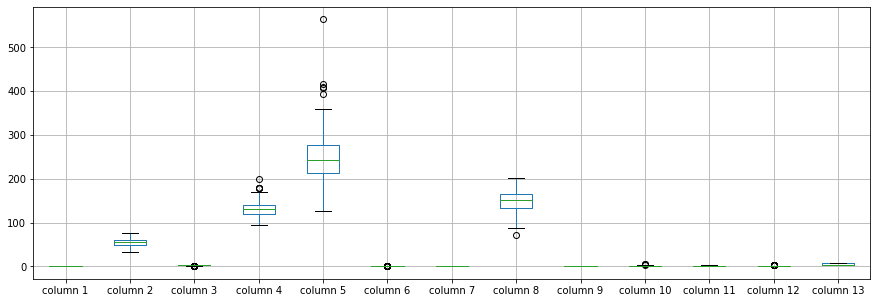

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.690083
column 2      54.540426
column 3       3.201613
column 4     130.943775
column 5     249.304688
column 6       0.148760
column 7       1.041322
column 8     149.254032
column 9       0.350000
column 10      1.052823
column 11      1.594378
column 12      0.650980
column 13      4.713675
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.064992,0.002548,-0.137777,-0.170675,0.036491,0.017943,-0.040795,0.129182,0.075834,0.060954,0.050266,0.430968
column 2,-0.064992,1.000000,0.111784,0.267988,0.213920,0.142577,0.156799,-0.430952,0.057596,0.114567,0.177380,0.364635,0.127475
column 3,0.002548,0.111784,1.000000,-0.071795,0.091024,-0.097124,0.052172,-0.339807,0.406396,0.219266,0.226618,0.206351,0.284092
column 4,-0.137777,0.267988,-0.071795,1.000000,0.162428,0.121583,0.104194,-0.090757,0.075184,0.208201,0.117258,0.065885,0.085021
column 5,-0.170675,0.213920,0.091024,0.162428,1.000000,0.003729,0.171066,-0.043100,0.083550,0.038939,0.013617,0.117247,0.099092
column 6,0.036491,0.142577,-0.097124,0.121583,0.003729,1.000000,0.071916,0.002147,0.047746,-0.016307,0.003738,0.181000,0.040661
column 7,0.017943,0.156799,0.052172,0.104194,0.171066,0.071916,1.000000,-0.110627,0.126243,0.033432,0.139254,0.086189,-0.000470
column 8,-0.040795,-0.430952,-0.339807,-0.090757,-0.043100,0.002147,-0.110627,1.000000,-0.380742,-0.350503,-0.380177,-0.252543,-0.237419
column 9,0.129182,0.057596,0.406396,0.075184,0.083550,0.047746,0.126243,-0.380742,1.000000,0.237601,0.280389,0.104089,0.244604
column 10,0.075834,0.114567,0.219266,0.208201,0.038939,-0.016307,0.033432,-0.350503,0.237601,1.000000,0.568290,0.230539,0.282430


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+45,13+45+45,13+45+45+45,13+45+45+45+45,13+45+45+45+45+45,13+45+45+45+45,13+45+45+45,13+45+45,13+45,13], vae_layer = False, seed = 45)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 564.8375663757324
Epoch: 1 , loss: 563.3824768066406
Epoch: 2 , loss: 563.2108421325684
Epoch: 3 , loss: 563.7012519836426
Epoch: 4 , loss: 562.0789756774902
Epoch: 5 , loss: 563.6662521362305
Epoch: 6 , loss: 563.1172790527344
Epoch: 7 , loss: 561.8412551879883
Epoch: 8 , loss: 563.3585472106934
Epoch: 9 , loss: 563.81689453125
Epoch: 10 , loss: 564.9308700561523
Epoch: 11 , loss: 565.2153816223145
Epoch: 12 , loss: 560.5828704833984
Epoch: 13 , loss: 563.2017860412598
Epoch: 14 , loss: 563.0957870483398
Epoch: 15 , loss: 563.644847869873
Epoch: 16 , loss: 562.9537162780762
Epoch: 17 , loss: 561.5293807983398
Epoch: 18 , loss: 563.7266902923584
Epoch: 19 , loss: 563.3613395690918
Epoch: 20 , loss: 561.5815258026123
Epoch: 21 , loss: 559.6778450012207
Epoch: 22 , loss: 556.9756011962891
Epoch: 23 , loss: 556.3152618408203
Epoch: 24 , loss: 553.9433670043945
Epoch: 25 , loss: 549.6836318969727
Epoch: 26

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-1.762924,0.00000
1,0.230706,-55.672801,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
2,0.000000,0.000000,0.0,-74.354389,0.0,0.000000,1.107390,-88.780903,0.000000,0.0,0.0,0.000000,0.00000
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.283582,0.000000,0.000000,0.0,0.0,0.000000,0.00000
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0.000000,0.0,-154.778530,0.0,-0.958456,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
266,0.000000,-32.097043,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
267,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
268,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.208937,0.00000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1251.5907871107538, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.23114460208537502

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.000000,70.000000,4.0,130.000000,322.0,0.000000,2.000000,109.000000,0.000000,2.4,2.0,1.237076,3.00000
1,0.230706,11.327199,3.0,115.000000,564.0,0.000000,2.000000,160.000000,0.000000,1.6,2.0,0.000000,7.00000
2,1.000000,57.000000,2.0,49.645611,261.0,0.000000,1.107390,52.219097,0.000000,0.3,1.0,0.000000,7.00000
3,1.000000,64.000000,4.0,128.000000,263.0,0.000000,0.283582,105.000000,1.000000,0.2,2.0,1.000000,7.00000
4,0.000000,74.000000,2.0,120.000000,269.0,0.000000,2.000000,121.000000,1.000000,0.2,1.0,1.000000,3.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.000000,52.000000,3.0,17.221470,199.0,0.041544,0.000000,162.000000,0.000000,0.5,1.0,0.000000,7.00000
266,1.000000,11.902957,2.0,120.000000,263.0,0.000000,0.000000,173.000000,0.000000,0.0,1.0,0.000000,7.00000
267,0.000000,56.000000,2.0,140.000000,294.0,0.000000,2.000000,153.000000,0.000000,1.3,2.0,0.000000,3.00000
268,1.000000,57.000000,4.0,140.000000,192.0,0.000000,0.000000,148.000000,0.000000,0.4,2.0,0.208937,6.00000


In [20]:
imputations[-1].to_excel("Sheart_NL_10(imp).xlsx", index=False, header=False)